# Bidirectional LSTM on the IMDB sentiment classification

## Reading Data and ETL

In [1]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 100
batch_size = 32

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


## Build a Neural Networ

In [5]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy','mae','mse','mape','cosine'])

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 8005s 320ms/step - loss: 0.4148 - acc: 0.8082 - mean_absolute_error: 0.2710 - mean_squared_error: 0.1329 - mean_absolute_percentage_error: 134591905.4362 - cosine_proximity: -0.5000 - val_loss: 0.3545 - val_acc: 0.8500 - val_mean_absolute_error: 0.1904 - val_mean_squared_error: 0.1090 - val_mean_absolute_percentage_error: 94382663.8630 - val_cosine_proximity: -0.5000
Epoch 2/4
25000/25000 [==============================] - 5503s 220ms/step - loss: 0.2277 - acc: 0.9122 - mean_absolute_error: 0.1362 - mean_squared_error: 0.0663 - mean_absolute_percentage_error: 67832481.3901 - cosine_proximity: -0.5000 - val_loss: 0.3554 - val_acc: 0.8434 - val_mean_absolute_error: 0.2096 - val_mean_squared_error: 0.1114 - val_mean_absolute_percentage_error: 106042623.4598 - val_cosine_proximity: -0.5000
Epoch 3/4
25000/25000 [================

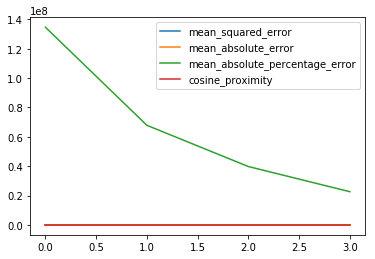

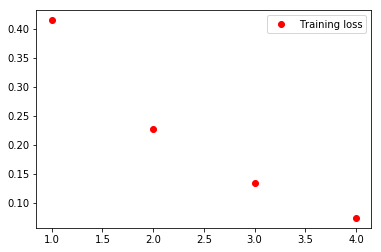

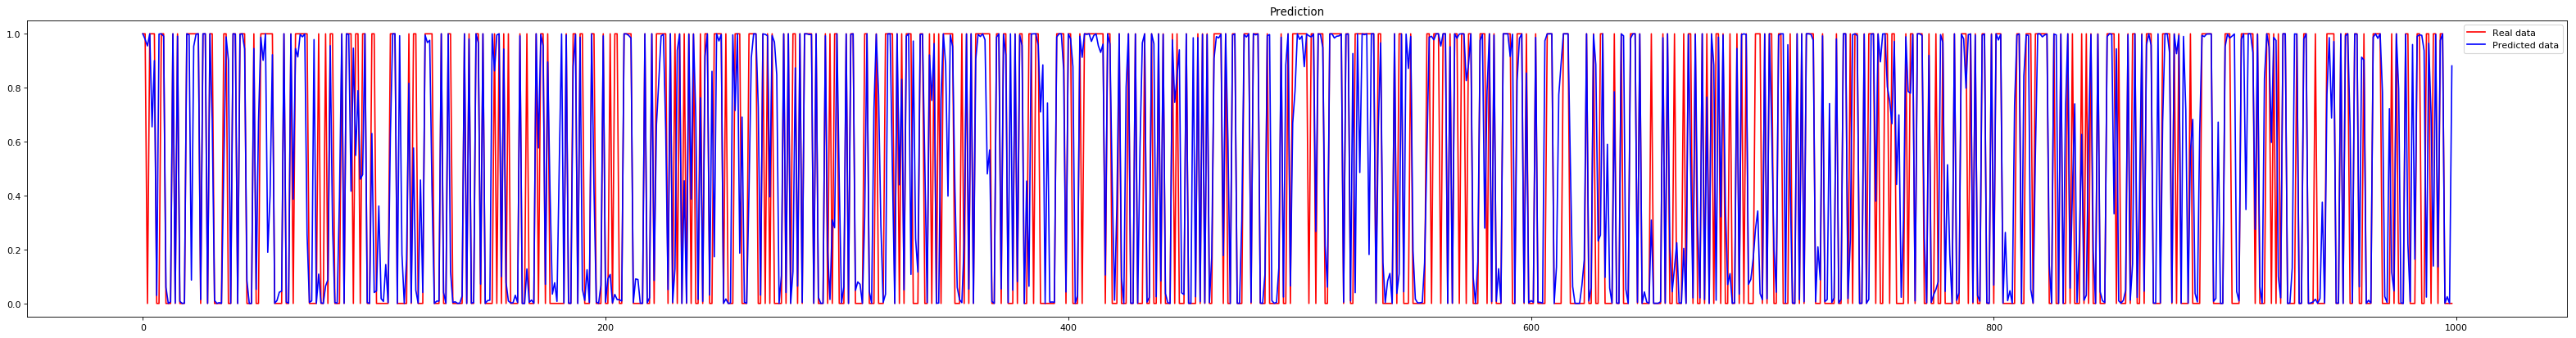

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
mape_loss=history.history['mean_absolute_percentage_error']
cosine_los=history.history['cosine_proximity']
plt.plot(history.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(history.history['mean_absolute_error'], label = 'mean_absolute_error')
plt.plot(history.history['mean_absolute_percentage_error'], label = 'mean_absolute_percentage_error')
plt.plot(history.history['cosine_proximity'], label = 'cosine_proximity')
plt.legend()
plt.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(x_test)

from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(y_test[1:1000], color = 'red', label = 'Real data')
plt.plot(y_pred[1:1000], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = model.predict(x_test) 
y_classes_predict = y_prob.argmax(axis=-1)
y_classes_real = [np.argmax(y, axis=None, out=None) for y in y_test]

print('Total accuracy:' ,(accuracy_score(y_classes_real,y_classes_predict)))
confusion_matrix(y_classes_real,y_classes_predict)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_classes_real, y_classes_predict)

print('precision for each class: {}'.format(precision))
print('recall for each class: {}'.format(recall))
print('fscore for each class: {}'.format(fscore))
print('support for each class: {}'.format(support))